In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate

### importing data

In [2]:
df_btc = pd.read_csv('btc.csv',index_col=0)
df_eth = pd.read_csv('eth.csv',index_col=0)
df_audio = pd.read_csv('audio.csv',index_col=0)
df_ltc = pd.read_csv('ltc.csv',index_col=0)
df_gmt = pd.read_csv('gmt.csv',index_col=0)
df_shib = pd.read_csv('shib.csv',index_col=0)

### upside/downside ratio

In [3]:
df_btc['close_open_gap'] = df_btc['c'] - df_btc['o']
df_eth['close_open_gap'] = df_eth['c'] - df_eth['o']
df_audio['close_open_gap'] = df_audio['c'] - df_audio['o']
df_ltc['close_open_gap'] = df_ltc['c'] - df_ltc['o']
df_gmt['close_open_gap'] = df_gmt['c'] - df_gmt['o']
df_shib['close_open_gap'] = df_shib['c'] - df_shib['o']

In [4]:
# create a column called advancing issue
df_btc['advancing_issue'] = np.where(df_btc['close_open_gap'] > 0, 1, 0)
df_eth['advancing_issue'] = np.where(df_eth['close_open_gap'] > 0, 1, 0)
df_audio['advancing_issue'] = np.where(df_audio['close_open_gap'] > 0, 1, 0)
df_ltc['advancing_issue'] = np.where(df_ltc['close_open_gap'] > 0, 1, 0)
df_gmt['advancing_issue'] = np.where(df_gmt['close_open_gap'] > 0, 1, 0)
df_shib['advancing_issue'] = np.where(df_shib['close_open_gap'] > 0, 1, 0)

# create a column called declining issue
df_btc['declining_issue'] = np.where(df_btc['close_open_gap'] < 0, 1, 0)
df_eth['declining_issue'] = np.where(df_eth['close_open_gap'] < 0, 1, 0)
df_audio['declining_issue'] = np.where(df_audio['close_open_gap'] < 0, 1, 0)
df_ltc['declining_issue'] = np.where(df_ltc['close_open_gap'] < 0, 1, 0)
df_gmt['declining_issue'] = np.where(df_gmt['close_open_gap'] < 0, 1, 0)
df_shib['declining_issue'] = np.where(df_shib['close_open_gap'] < 0, 1, 0)

df_shib.head(3)

,epoch,o,h,l,c,v,close_open_gap,advancing_issue,declining_issue
datetime,,,,,,,,,
2021-05-09,1.620600e+12,0.000014,0.000050,0.000014,0.000035,9.530230e+13,0.000021,1,0
2021-05-10,1.620690e+12,0.000035,0.000038,0.000028,0.000030,6.451280e+13,-0.000004,0,1
2021-05-11,1.620780e+12,0.000030,0.000031,0.000017,0.000018,8.690910e+13,-0.000012,0,1


In [5]:
# sum up advancing issues and declining issues
advancing_issue_sum_btc = df_btc['advancing_issue'].sum()
declining_issue_sum_btc = df_btc['declining_issue'].sum()

advancing_issue_sum_eth = df_eth['advancing_issue'].sum()
declining_issue_sum_eth = df_eth['declining_issue'].sum()

advancing_issue_sum_audio = df_audio['advancing_issue'].sum()
declining_issue_sum_audio = df_audio['declining_issue'].sum()

advancing_issue_sum_ltc = df_ltc['advancing_issue'].sum()
declining_issue_sum_ltc = df_ltc['declining_issue'].sum()

advancing_issue_sum_gmt = df_gmt['advancing_issue'].sum()
declining_issue_sum_gmt = df_gmt['declining_issue'].sum()

advancing_issue_sum_shib = df_shib['advancing_issue'].sum()
declining_issue_sum_shib = df_shib['declining_issue'].sum()

# divide advancing issues/declining issues = upside/downside ratio
upside_downside_ratio_btc = advancing_issue_sum_btc/declining_issue_sum_btc
upside_downside_ratio_eth = advancing_issue_sum_eth/declining_issue_sum_eth
upside_downside_ratio_audio = advancing_issue_sum_audio/declining_issue_sum_audio
upside_downside_ratio_ltc = advancing_issue_sum_ltc/declining_issue_sum_ltc
upside_downside_ratio_gmt = advancing_issue_sum_gmt/declining_issue_sum_gmt
upside_downside_ratio_shib = advancing_issue_sum_shib/declining_issue_sum_shib

print(f'upside_downside_ratio_btc: {upside_downside_ratio_btc}')
print(f'upside_downside_ratio_eth: {upside_downside_ratio_eth}')
print(f'upside_downside_ratio_audio: {upside_downside_ratio_audio}')
print(f'upside_downside_ratio_ltc: {upside_downside_ratio_ltc}')
print(f'upside_downside_ratio_gmt: {upside_downside_ratio_gmt}')
print(f'upside_downside_ratio_shib: {upside_downside_ratio_shib}')

upside_downside_ratio_btc: 1.1605263157894736
upside_downside_ratio_eth: 1.2493150684931507
upside_downside_ratio_audio: 0.9811320754716981
upside_downside_ratio_ltc: 1.0815450643776825
upside_downside_ratio_gmt: 1.6666666666666667
upside_downside_ratio_shib: 0.8941176470588236


### measuring drawdown

In [6]:
# btc drawdown
daily_close_pct_change = df_btc['c'].pct_change()
wealth_index = 1000 * (1 + daily_close_pct_change).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks) / previous_peaks

# eth drawdown
daily_close_pct_change_2 = df_eth['c'].pct_change()
wealth_index_2 = 1000 * (1 + daily_close_pct_change_2).cumprod()
previous_peaks_2 = wealth_index_2.cummax()
drawdown_2 = (wealth_index_2 - previous_peaks_2) / previous_peaks_2

# audio drawdown
daily_close_pct_change_3 = df_audio['c'].pct_change()
wealth_index_3 = 1000 * (1 + daily_close_pct_change_3).cumprod()
previous_peaks_3 = wealth_index_3.cummax()
drawdown_3 = (wealth_index_3 - previous_peaks_3) / previous_peaks_3

# gmt drawdown
daily_close_pct_change_4 = df_gmt['c'].pct_change()
wealth_index_4 = 1000 * (1 + daily_close_pct_change_4).cumprod()
previous_peaks_4 = wealth_index_3.cummax()
drawdown_4 = (wealth_index_4 - previous_peaks_4) / previous_peaks_4

# ltc drawdown
daily_close_pct_change_5 = df_ltc['c'].pct_change()
wealth_index_5 = 1000 * (1 + daily_close_pct_change_5).cumprod()
previous_peaks_5 = wealth_index_5.cummax()
drawdown_5 = (wealth_index_5 - previous_peaks_5) / previous_peaks_5

# shib drawdown
daily_close_pct_change_6 = df_shib['c'].pct_change()
wealth_index_6 = 1000 * (1 + daily_close_pct_change_6).cumprod()
previous_peaks_6 = wealth_index_6.cummax()
drawdown_6 = (wealth_index_6 - previous_peaks_6) / previous_peaks_6


In [7]:
# one data
def drawdown_plot(data):
    x = data.index.to_list(); y = data
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(x, y)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ticks = [i for i in range(1, len(x), 30)]
    ax.set_xticks(ticks)

    ticks_label = [x[i] for i in range(1, len(x), 30)]
    ax.set_xticklabels(ticks_label)
    plt.show()

In [8]:
# multiple data
def drawdown_plot_multiple(data, labels, xlabel='Date', ylabel='Drawdown value', title='Drawdown of Six Cyptocurrency'):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    for idx, d in enumerate(data):
        x = d.index.to_list(); y = d
        ax.plot(x, y, label=labels[idx])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ticks = [i for i in range(1, len(data[0]), 30)]
    ax.set_xticks(ticks)

    ticks_label = [data[0].index.to_list()[i] for i in range(1, len(data[0]), 30)]
    
    ax.set_xticklabels(ticks_label)
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

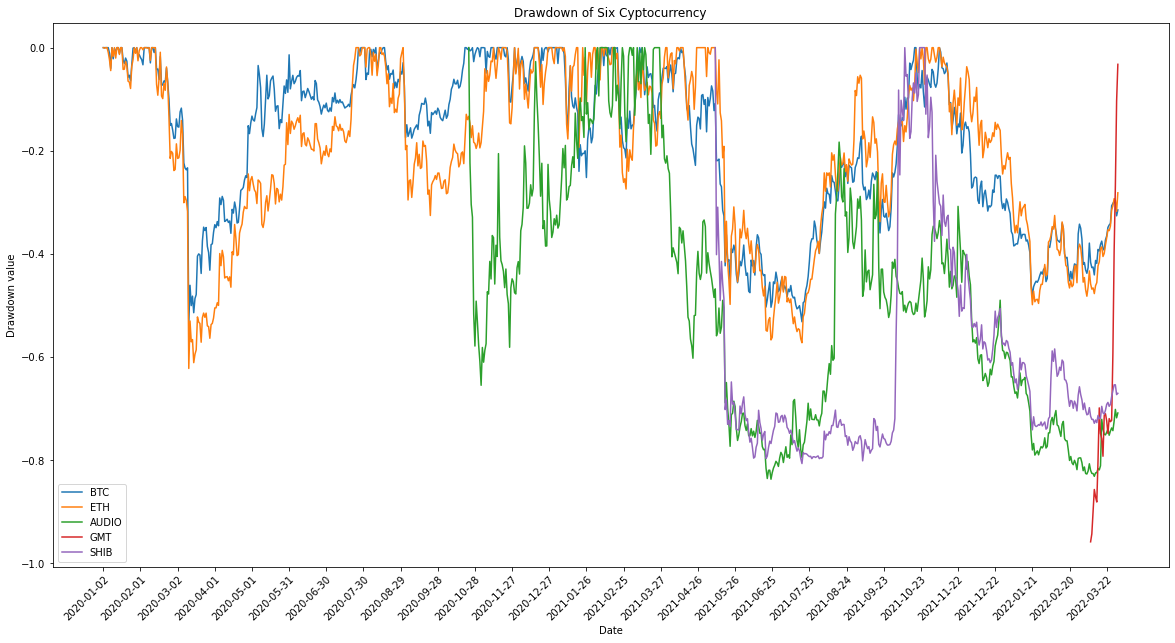

In [11]:
l = [drawdown, drawdown_2, drawdown_3, drawdown_4, drawdown_6]
labels = ['BTC','ETH','AUDIO','GMT','SHIB']
drawdown_plot_multiple(l, labels)

### measuring value at risk (VaR)
Value at Risk (VaR) refers to a threshold that indicates a loss will not exceed a certain level. VaR is always given a confidence level which is quoted with quantiles such as 95, 99, and 99.9.

In [12]:
# btc VaR
daily_close_pct_change.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change.quantile(0.1)
VaR_95 = daily_close_pct_change.quantile(0.05)
VaR_99 = daily_close_pct_change.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0390097
95%                      -0.0579824
99%                      -0.0960686


In [13]:
# eth VaR
daily_close_pct_change_2.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change_2.quantile(0.1)
VaR_95 = daily_close_pct_change_2.quantile(0.05)
VaR_99 = daily_close_pct_change_2.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0509359
95%                      -0.0712212
99%                      -0.129465


In [14]:
# audio VaR
daily_close_pct_change_3.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change_3.quantile(0.1)
VaR_95 = daily_close_pct_change_3.quantile(0.05)
VaR_99 = daily_close_pct_change_3.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                       -0.095964
95%                       -0.126882
99%                       -0.196045


In [15]:
# gmt VaR
daily_close_pct_change_4.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change_4.quantile(0.1)
VaR_95 = daily_close_pct_change_4.quantile(0.05)
VaR_99 = daily_close_pct_change_4.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                       -0.115353
95%                       -0.137758
99%                       -0.159981


In [16]:
# ltc VaR
daily_close_pct_change_5.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change_5.quantile(0.1)
VaR_95 = daily_close_pct_change_5.quantile(0.05)
VaR_99 = daily_close_pct_change_5.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                     -0.00301043
95%                     -0.00483722
99%                     -0.00839232


In [17]:
# shib VaR
daily_close_pct_change_6.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change_6.quantile(0.1)
VaR_95 = daily_close_pct_change_6.quantile(0.05)
VaR_99 = daily_close_pct_change_6.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0781883
95%                      -0.109811
99%                      -0.193286


### measuring conditional value at risk (CVaR)
Conditional Value at Risk (CVaR) refers to a measurement of an estimate of expected losses in the worst scenarios. Similar to VaR, CVaR is also always quoted with quantiles such as 90, 95, or 99.
If a CVaR(95) = -3%, this means in the worst 5% of cases, losses were on average exceed -3% based on the historical values.

In [18]:
# btc
CVaR_90 = daily_close_pct_change[daily_close_pct_change <= VaR_90].mean()
CVaR_95 = daily_close_pct_change[daily_close_pct_change <= VaR_95].mean()
CVaR_99 = daily_close_pct_change[daily_close_pct_change <= VaR_99].mean()

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))


Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                   -0.118914
95%                                                   -0.169243
99%                                                   -0.395048


In [19]:
# eth
CVaR_90 = daily_close_pct_change_2[daily_close_pct_change_2 <= VaR_90].mean()
CVaR_95 = daily_close_pct_change_2[daily_close_pct_change_2 <= VaR_95].mean()
CVaR_99 = daily_close_pct_change_2[daily_close_pct_change_2 <= VaR_99].mean()

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))


Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                   -0.122133
95%                                                   -0.173523
99%                                                   -0.36167


In [20]:
# audio
CVaR_90 = daily_close_pct_change_3[daily_close_pct_change_3 <= VaR_90].mean()
CVaR_95 = daily_close_pct_change_3[daily_close_pct_change_3 <= VaR_95].mean()
CVaR_99 = daily_close_pct_change_3[daily_close_pct_change_3 <= VaR_99].mean()

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))


Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                   -0.123351
95%                                                   -0.156605
99%                                                   -0.257242


In [21]:
# gmt
CVaR_90 = daily_close_pct_change_4[daily_close_pct_change_4 <= VaR_90].mean()
CVaR_95 = daily_close_pct_change_4[daily_close_pct_change_4 <= VaR_95].mean()
CVaR_99 = daily_close_pct_change_4[daily_close_pct_change_4 <= VaR_99].mean()

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))


Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                   -0.115061
95%                                                   -0.141659
99%                                                  nan


In [22]:
# ltc
CVaR_90 = daily_close_pct_change_5[daily_close_pct_change_5 <= VaR_90].mean()
CVaR_95 = daily_close_pct_change_5[daily_close_pct_change_5 <= VaR_95].mean()
CVaR_99 = daily_close_pct_change_5[daily_close_pct_change_5 <= VaR_99].mean()

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))


Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                         nan
95%                                                         nan
99%                                                         nan


In [23]:
# shib
CVaR_90 = daily_close_pct_change_6[daily_close_pct_change_6 <= VaR_90].mean()
CVaR_95 = daily_close_pct_change_6[daily_close_pct_change_6 <= VaR_95].mean()
CVaR_99 = daily_close_pct_change_6[daily_close_pct_change_6 <= VaR_99].mean()

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))


Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                   -0.137262
95%                                                   -0.177317
99%                                                   -0.305563


### extracting closing price
https://towardsdatascience.com/cryptocurrency-analysis-with-python-buy-and-hold-c3b0bc164ffa

In [24]:
def import_local_data(filename, tickers=['c'], date_info='datetime'):
    # Read stock data from external file
    data = pd.read_csv(filename)
    
    # Convert the datatype of date information from string to datetime 
    # and set the date information as index of DataFrame
    data[date_info] = [date.split()[0] for date in data[date_info]]
    #data[date_info] = pd.to_datetime(data[date_info])
    data = data.set_index(date_info)
    data = data[tickers]
    data.columns = [filename.split('.')[0]]

    return data


In [25]:
filenames = ['btc.csv','gmt.csv','eth.csv','audio.csv','shib.csv']
dfs = [import_local_data(filename).squeeze() for filename in filenames] 
#dfs[0].squeeze()

### visualize absolute closing prices

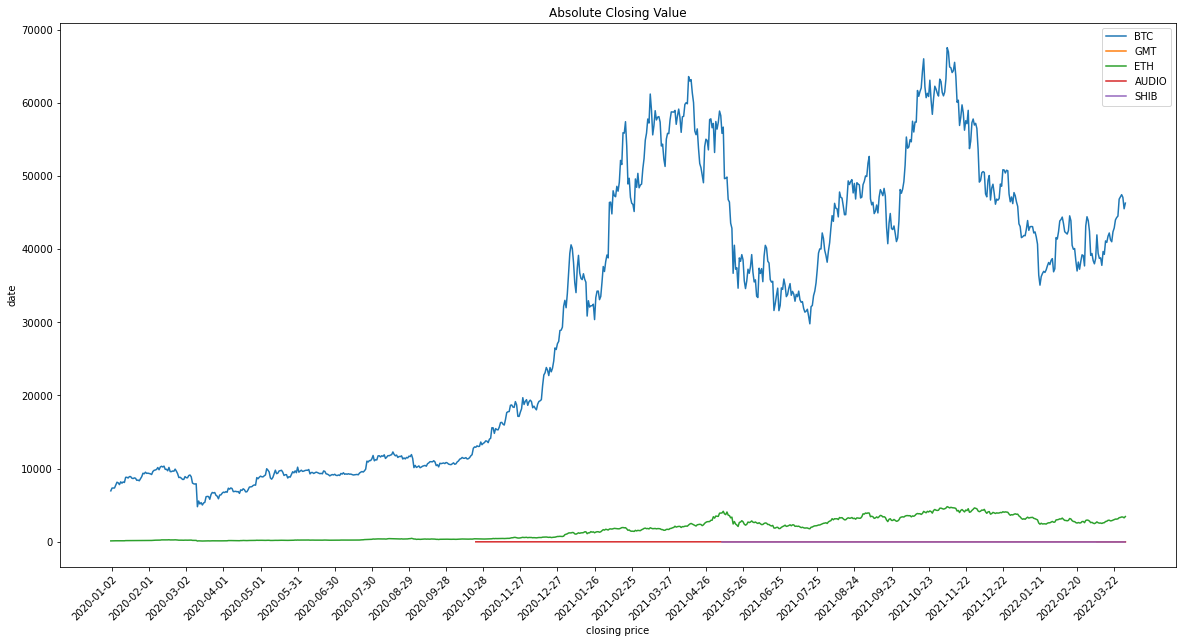

In [27]:
labels = ['BTC','GMT','ETH','AUDIO','SHIB']
drawdown_plot_multiple(dfs, labels=labels, xlabel='closing price', ylabel='date',title='Absolute Closing Value')


### Visualize relative changes in closing prices

In [28]:
# btc drawdown
daily_close_pct_change = df_btc['c'].pct_change()

# eth drawdown
daily_close_pct_change_2 = df_eth['c'].pct_change()

# audio drawdown
daily_close_pct_change_3 = df_audio['c'].pct_change()

# gmt drawdown
daily_close_pct_change_4 = df_gmt['c'].pct_change()

# ltc drawdown
daily_close_pct_change_5 = df_ltc['c'].pct_change()

# shib drawdown
daily_close_pct_change_6 = df_shib['c'].pct_change()


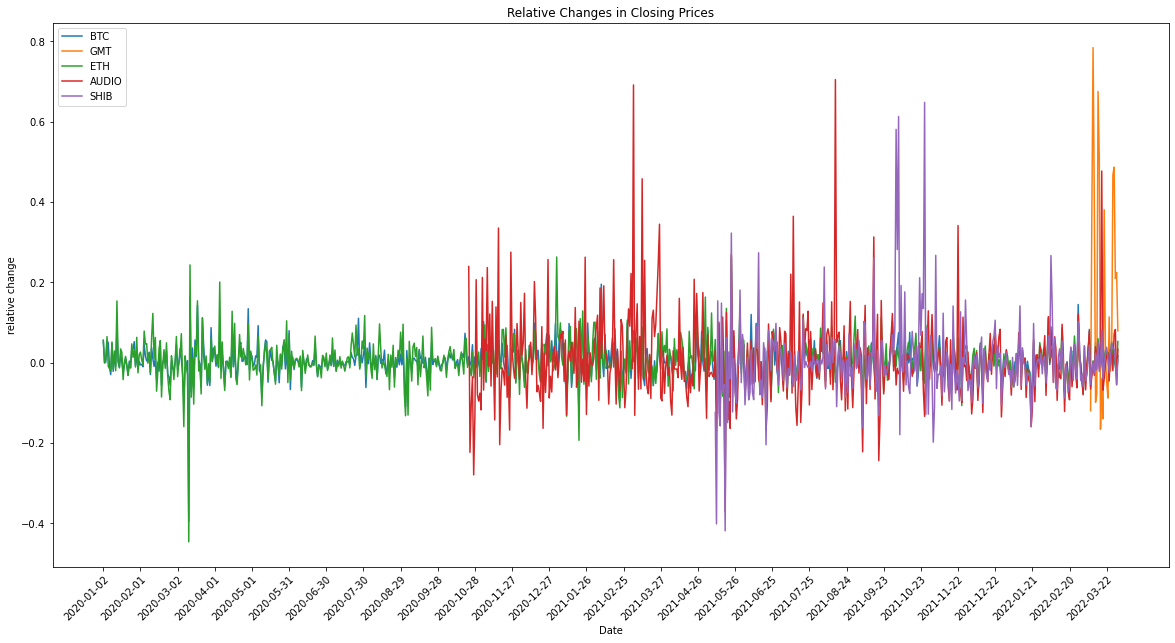

In [29]:
filenames = ['btc.csv','gmt.csv','eth.csv','audio.csv','shib.csv']
dfs = [import_local_data(filename).pct_change().squeeze() for filename in filenames] 

labels = ['BTC','GMT','ETH','AUDIO','SHIB']
drawdown_plot_multiple(dfs, labels, xlabel='Date',ylabel='relative change', title='Relative Changes in Closing Prices')


### Measure the correlation of closing prices

In [30]:
df_btc = pd.read_csv('btc.csv')
df_ltc = pd.read_csv('ltc.csv')
df_gmt = pd.read_csv('gmt.csv')
df_eth = pd.read_csv('eth.csv')
df_audio = pd.read_csv('audio.csv')
df_shib = pd.read_csv('shib.csv')

In [31]:
df = pd.DataFrame({
    'datetime':df_btc.datetime,
    'BTC':df_btc.c,
    'ETH':df_eth.c,
    'SHIB': df_shib.c,
    'AUDIO':df_audio.c,
    'OOKI':df_ltc.c,
    'GMT':df_gmt.c
})
df = df.set_index('datetime')
df.head()

,BTC,ETH,SHIB,AUDIO,OOKI,GMT
datetime,,,,,,
2020-01-01,6965.71,127.19,0.000035,0.19226,0.9064,0.13262
2020-01-02,7344.96,134.35,0.000030,0.23827,0.9036,0.11677
2020-01-03,7354.11,134.20,0.000018,0.18508,0.9067,0.15958
2020-01-04,7358.75,135.37,0.000021,0.16585,0.9054,0.28472
2020-01-05,7758.00,144.15,0.000018,0.15999,0.9084,0.39885


<ipython-input-32-409026e8cf71>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

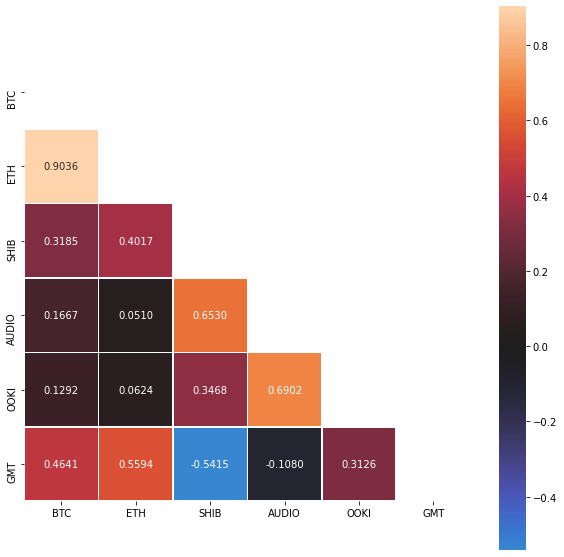

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

### buy and hold strategy

### Visualize returns
days to buy: see most profitable period

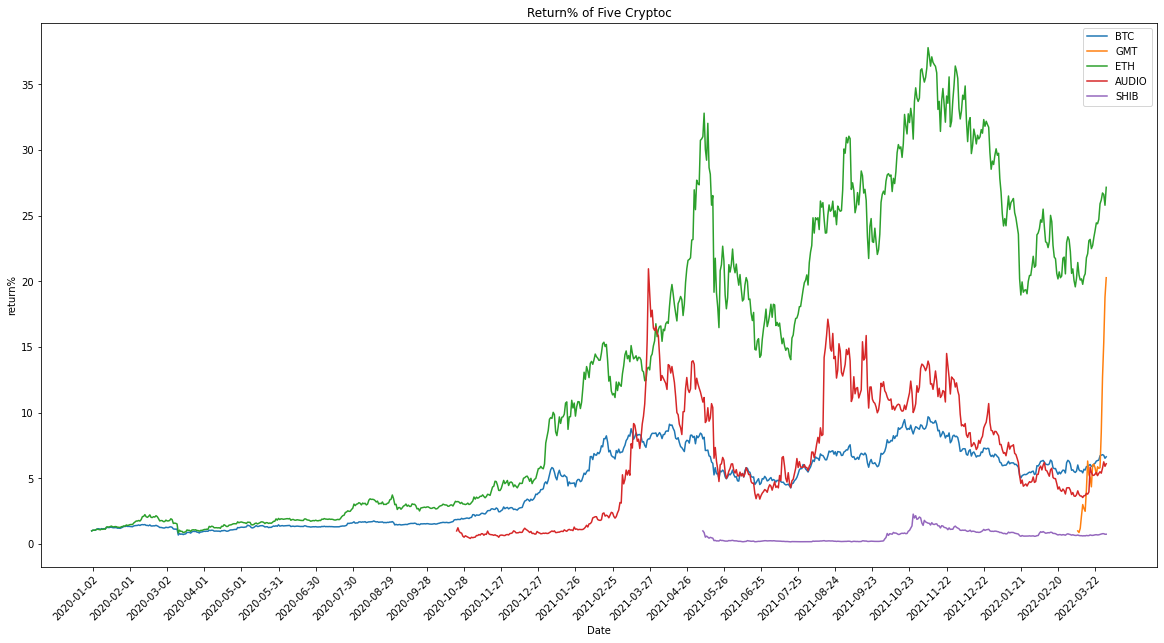

In [58]:
filenames = ['btc.csv','gmt.csv','eth.csv','audio.csv','shib.csv']
df_return = [import_local_data(filename).apply(lambda x: x / x[0]).squeeze() for filename in filenames] 

labels = ['BTC','GMT','ETH','AUDIO','SHIB']
drawdown_plot_multiple(df_return, labels, xlabel='Date',ylabel='return%', title='Return% of Five Cryptoc')
plt.show()

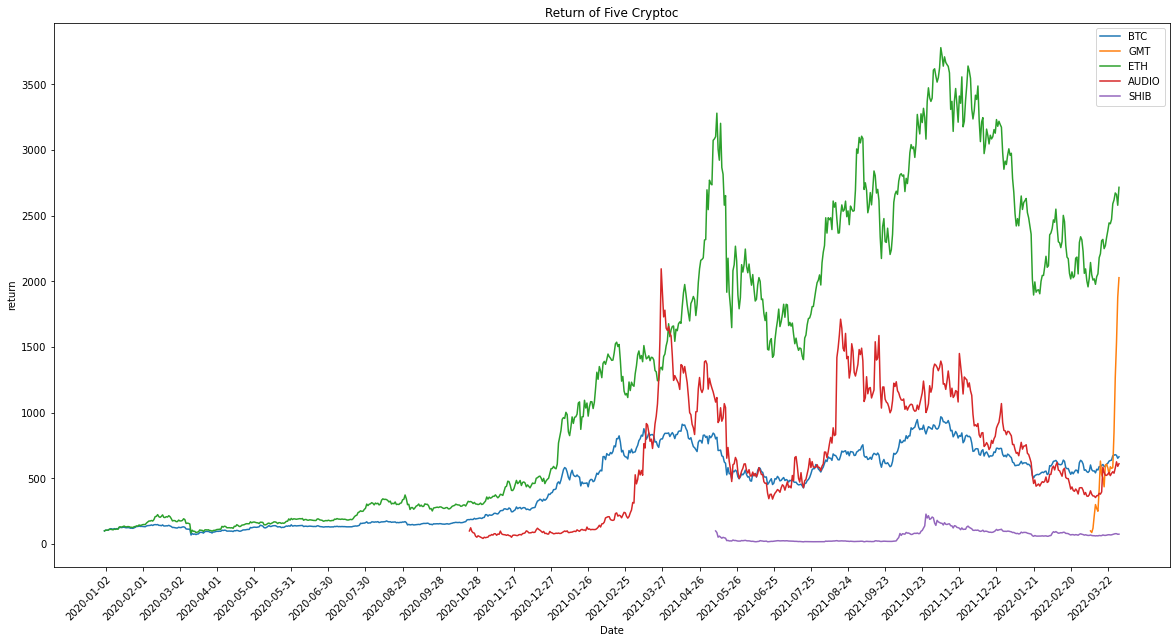

In [34]:
filenames = ['btc.csv','gmt.csv','eth.csv','audio.csv','shib.csv']
df_return = [import_local_data(filename).apply(lambda x: x / x[0]*100).squeeze() for filename in filenames] 

labels = ['BTC','GMT','ETH','AUDIO','SHIB']
drawdown_plot_multiple(df_return, labels, xlabel='Date',ylabel='return', title='Return of Five Cryptoc')


### Portfolio Optimization
https://github.com/eliasmelul/finance_portfolio

In [56]:
filenames = ['btc.csv','gmt.csv','eth.csv','audio.csv','shib.csv']
df_portfolio = [import_local_data(filename).squeeze() for filename in filenames] 

labels = ['BTC','GMT','ETH','AUDIO','SHIB']

df_portfolio = pd.DataFrame(df_portfolio)
df_portfolio = df_portfolio.transpose()
df_portfolio = df_portfolio.dropna()
df_portfolio

,btc,gmt,eth,audio,shib
datetime,,,,,
2022-03-08,41941.71,0.13262,2726.98,0.779,0.000024
2022-03-09,39422.00,0.11677,2606.70,0.728,0.000023
2022-03-10,38729.57,0.15958,2556.86,0.704,0.000022
2022-03-11,38807.36,0.28472,2568.80,0.703,0.000022
2022-03-12,37777.34,0.39885,2515.65,0.681,0.000022
2022-03-13,39671.37,0.35948,2589.41,0.708,0.000022
2022-03-14,39280.33,0.33128,2617.73,0.709,0.000022
2022-03-15,41114.00,0.55492,2773.81,0.742,0.000023
2022-03-16,40917.90,0.83862,2811.92,0.731,0.000022


Expected Portfolio Return: 353.17%
Expected Portfolio Variance: 21.67%
Expected Portfolio Volatility: 46.55%


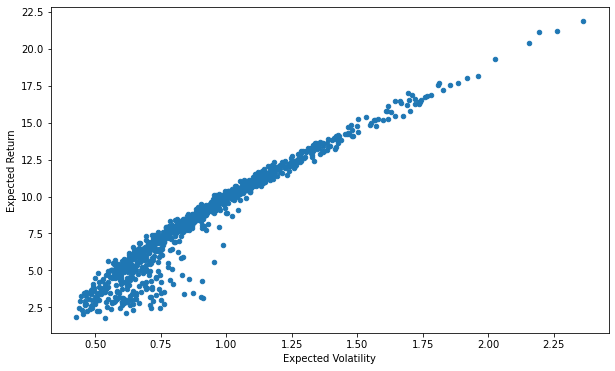

In [57]:
log_returns = np.log(df_portfolio / df_portfolio.shift(1))
log_returns.mean()*250

num_assets = len(labels)

weights = np.random.random(num_assets)
weights /= np.sum(weights)

pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    pfolio_returns.append(np.sum(weights*log_returns.mean())*252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

portfolios = pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_volatilities})

portfolios.plot(x='Volatility',y='Return', kind='scatter', figsize=(10,6))
#plt.axis([0,])
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

print(f"Expected Portfolio Return: {round(np.sum(weights * log_returns.mean())*252*100,2)}%")
print(f"Expected Portfolio Variance: {round(100*np.dot(weights.T, np.dot(log_returns.cov() *252, weights)),2)}%")
print(f"Expected Portfolio Volatility: {round(100*np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))),2)}%")

### Monte Carlo Analysis

In [73]:
def import_local_data(tickers=['c'], date_info='datetime'):
    # Read stock data from external file
    data = pd.read_csv("audio.csv")
    
    # Convert the datatype of date information from string to datetime 
    # and set the date information as index of DataFrame
    data[date_info] = [date.split()[0] for date in data[date_info]]
    data[date_info] = pd.to_datetime(data[date_info])
    data = data.set_index(date_info)


    return data[tickers]

data = import_local_data(tickers=['c'], date_info='datetime')
data

,c
datetime,
2020-10-22,0.19226
2020-10-23,0.23827
2020-10-24,0.18508
2020-10-25,0.16585
2020-10-26,0.15999
...,...
2022-03-27,1.03800
2022-03-28,1.11200
2022-03-29,1.20400


In [74]:
def import_stock_data(tickers, start = '2010-1-1', end = datetime.today().strftime('%Y-%m-%d')):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)

    
def log_returns(data):
    return (np.log(1+data.pct_change()))
def simple_returns(data):
    return ((data/data.shift(1))-1)
    
def market_data_combination(data, mark_ticker = "^GSPC", start='2010-1-1'):
    market_data = import_stock_data(mark_ticker, start)
    market_rets = log_returns(market_data).dropna()
    ann_return = np.exp(market_rets.mean()*252).values-1
    data = data.merge(market_data, left_index=True, right_index=True)
    return data, ann_return

def beta_sharpe(data, mark_ticker = "^GSPC", start='2010-1-1', riskfree = 0.025):
    
    """
    Input: 
    1. data: dataframe of stock price data
    2. mark_ticker: ticker of the market data you want to compute CAPM metrics with (default is ^GSPC)
    3. start: data from which to download data (default Jan 1st 2010)
    4. riskfree: the assumed risk free yield (US 10 Year Bond is assumed: 2.5%)
    
    Output:
    1. Dataframe with CAPM metrics computed against specified market procy
    """
    # Beta
    dd, mark_ret = market_data_combination(data, mark_ticker, start)
    log_ret = log_returns(dd)
    covar = log_ret.cov()*252
    covar = pd.DataFrame(covar.iloc[:-1,-1])
    mrk_var = log_ret.iloc[:,-1].var()*252
    beta = covar/mrk_var
    
    stdev_ret = pd.DataFrame(((log_ret.std()*250**0.5)[:-1]), columns=['STD'])
    beta = beta.merge(stdev_ret, left_index=True, right_index=True)
    
    # CAPM
    for i, row in beta.iterrows():
        beta.at[i,'CAPM'] = riskfree + (row[mark_ticker] * (mark_ret-riskfree))
    # Sharpe
    for i, row in beta.iterrows():
        beta.at[i,'Sharpe'] = ((row['CAPM']-riskfree)/(row['STD']))
    beta.rename(columns={"^GSPC":"Beta"}, inplace=True)
    
    return beta

def drift_calc(data, return_type='log'):
    if return_type=='log':
        lr = log_returns(data)
    elif return_type=='simple':
        lr = simple_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    try:
        return drift.values
    except:
        return drift

def daily_returns(data, days, iterations, return_type='log'):
    ft = drift_calc(data, return_type)
    if return_type == 'log':
        try:
            stv = log_returns(data).std().values
        except:
            stv = log_returns(data).std()
    elif return_type=='simple':
        try:
            stv = simple_returns(data).std().values
        except:
            stv = simple_returns(data).std()    
    #Oftentimes, we find that the distribution of returns is a variation of the normal distribution where it has a fat tail
    # This distribution is called cauchy distribution
    dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
    return dr

def probs_find(predicted, higherthan, ticker = None, on = 'value'):
    """
    This function calculated the probability of a stock being above a certain threshhold, which can be defined as a value (final stock price) or return rate (percentage change)
    Input: 
    1. predicted: dataframe with all the predicted prices (days and simulations)
    2. higherthan: specified threshhold to which compute the probability (ex. 0 on return will compute the probability of at least breakeven)
    3. on: 'return' or 'value', the return of the stock or the final value of stock for every simulation over the time specified
    4. ticker: specific ticker to compute probability for
    """
    if ticker == None:
        if on == 'return':
            predicted0 = predicted.iloc[0,0]
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
            less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
        elif on == 'value':
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [i for i in predList if i >= higherthan]
            less = [i for i in predList if i < higherthan]
        else:
            print("'on' must be either value or return")
    else:
        if on == 'return':
            predicted = predicted[predicted['ticker'] == ticker]
            predicted0 = predicted.iloc[0,0]
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
            less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
        elif on == 'value':
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [i for i in predList if i >= higherthan]
            less = [i for i in predList if i < higherthan]
        else:
            print("'on' must be either value or return")        
    return (len(over)/(len(over)+len(less)))

NameError: name 'datetime' is not defined

In [71]:
def simulate_mc(data, days, iterations, return_type='log', plot=True):
    # Generate daily returns
    returns = daily_returns(data, days, iterations, return_type)
    # Create empty matrix
    price_list = np.zeros_like(returns)
    # Put the last actual price in the first row of matrix. 
    price_list[0] = data.iloc[-1]
    # Calculate the price of each day
    for t in range(1,days):
        price_list[t] = price_list[t-1]*returns[t]
    
    # Plot Option
    if plot == True:
        x = pd.DataFrame(price_list).iloc[-1]
        fig, ax = plt.subplots(1,2, figsize=(14,4))
        sns.distplot(x, ax=ax[0])
        sns.distplot(x, hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
        plt.xlabel("Stock Price")
        plt.show()
    
    #CAPM and Sharpe Ratio
    
    # Printing information about stock
    try:
        [print(nam) for nam in data.columns]
    except:
        print(data.name)
    print(f"Days: {days-1}")
    print(f"Expected Value: ${round(pd.DataFrame(price_list).iloc[-1].mean(),2)}")
    print(f"Return: {round(100*(pd.DataFrame(price_list).iloc[-1].mean()-price_list[0,1])/pd.DataFrame(price_list).iloc[-1].mean(),2)}%")
    print(f"Probability of Breakeven: {probs_find(pd.DataFrame(price_list),0, on='return')}")
   
          
    return pd.DataFrame(price_list)

simulate_mc(data, 252, 1000, 'log')

NameError: name 'daily_returns' is not defined

In [ ]:
def monte_carlo(tickers, days_forecast, iterations, start_date = '2000-1-1', return_type = 'log', plotten=False):
    #data = import_stock_data(tickers, start=start_date)
    data = import_local_data(tickers)#[:252] # Set 252 here to ensure all the data size is the same
    inform = beta_sharpe(data, mark_ticker="^GSPC", start=start_date)
    simulatedDF = []
    for t in range(len(tickers)):
        y = simulate_mc(data.iloc[:,t], (days_forecast+1), iterations, return_type)
        if plotten == True:
            forplot = y.iloc[:,0:10]
            forplot.plot(figsize=(15,4))
        print(f"Beta: {round(inform.iloc[t,inform.columns.get_loc('Beta')],2)}")
        print(f"Sharpe: {round(inform.iloc[t,inform.columns.get_loc('Sharpe')],2)}") 
        print(f"CAPM Return: {round(100*inform.iloc[t,inform.columns.get_loc('CAPM')],2)}%")
        y['ticker'] = tickers[t]
        cols = y.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        y = y[cols]
        simulatedDF.append(y)
    simulatedDF = pd.concat(simulatedDF)
    return simulatedDF
    
start = "2020-10-22"
days_to_forecast= 251
simulation_trials= 1000
ret_sim_df = monte_carlo(['c'], days_to_forecast, simulation_trials,  start_date=start, plotten=False)

### Google Trend Analysis

In [66]:
df_google = pd.read_csv('multiTimeline.csv')

df_google.head(10)

,Date0,Bitcoin,Eth,Audius,Shibainu,Ooki,GMT
0,4/25/21,51,50,13,2,34,1
1,4/26/21,51,50,13,2,34,1
2,4/27/21,51,50,13,2,34,1
3,4/28/21,51,50,13,2,34,1
4,4/29/21,51,50,13,2,34,1
5,4/30/21,51,50,13,2,34,1
6,5/1/21,51,50,13,2,34,1
7,5/2/21,48,86,16,6,52,1
8,5/3/21,48,86,16,6,52,1
9,5/4/21,48,86,16,6,52,1


<ipython-input-68-1b2023d8e9a4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_2, dtype=np.bool)


<AxesSubplot:>

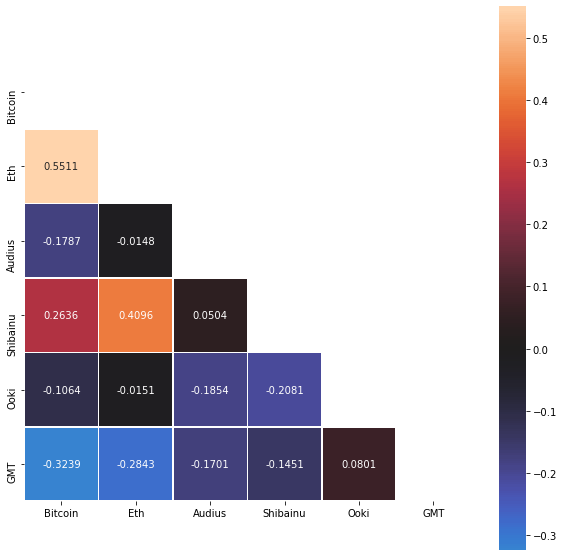

In [68]:
corr_2 = df_google.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_2, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)